In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

## 1.  Read the data as an appropriate Time Series data and plot the data.

In [2]:
df = pd.read_csv('Rose.csv')

In [3]:
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [4]:
date = pd.date_range(start='1/1/1980', periods=len(df), freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
df['Time_Stamp'] = date
df.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [6]:
df.set_index(keys='Time_Stamp',drop=True,inplace=True)
df.head()

,YearMonth,Rose
Time_Stamp,,
1980-01-31,1980-01,112.0
1980-02-29,1980-02,118.0
1980-03-31,1980-03,129.0
1980-04-30,1980-04,99.0
1980-05-31,1980-05,116.0


In [7]:
df.drop(labels=['YearMonth'],axis=1,inplace=True)
df.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [8]:
df.tail()

,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


### Plot the Time Series data.

In [9]:
from pylab import rcParams

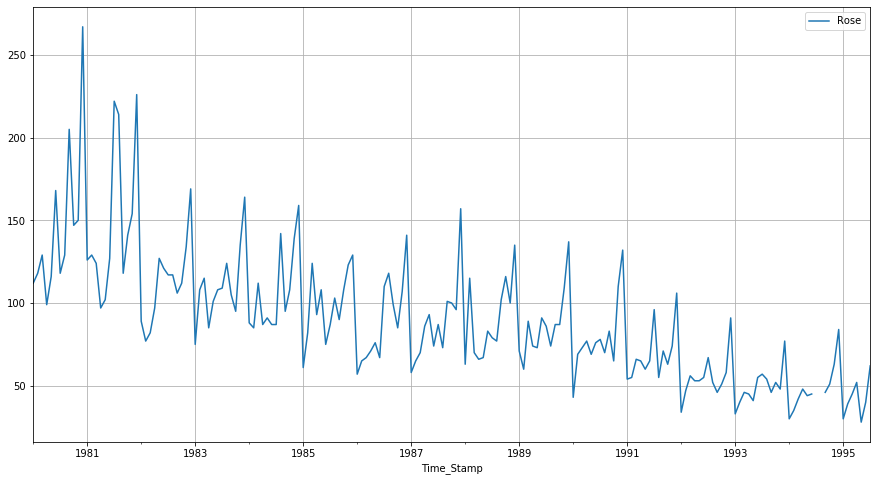

In [10]:
rcParams['figure.figsize'] = 15,8

df.plot()
plt.grid();

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [11]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


## Checking for Missing values

In [12]:
df.isnull().sum()

Rose    2
dtype: int64

## Imputing missing values with median

In [13]:
df['Rose'] = df['Rose'].fillna((df['Rose'].median()))

## Plot the Time series along with the mean and median of the Time series in the graph to get an understanding of the fluctuation of the data from these two measures of central tendency.

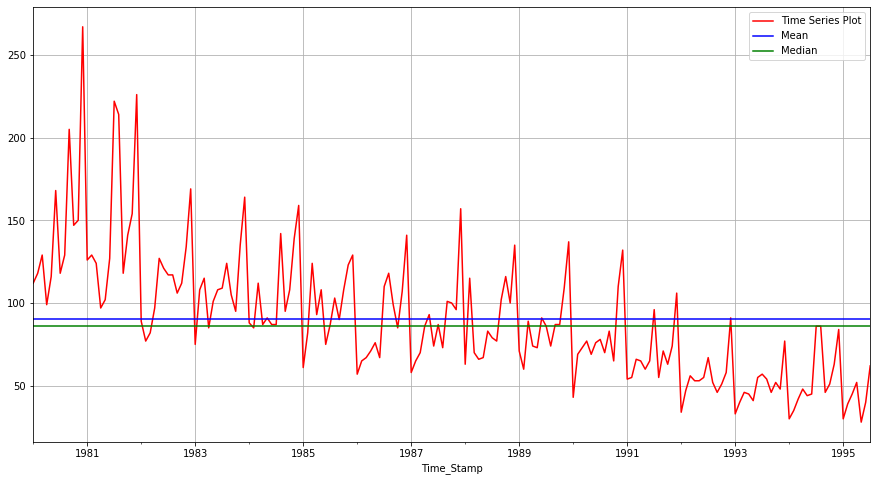

In [14]:
df.plot(color='Red')
plt.axhline(df['Rose'].mean(),color='Blue')
plt.axhline(df['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


## Plot a quarterly comparison  using a barplot.

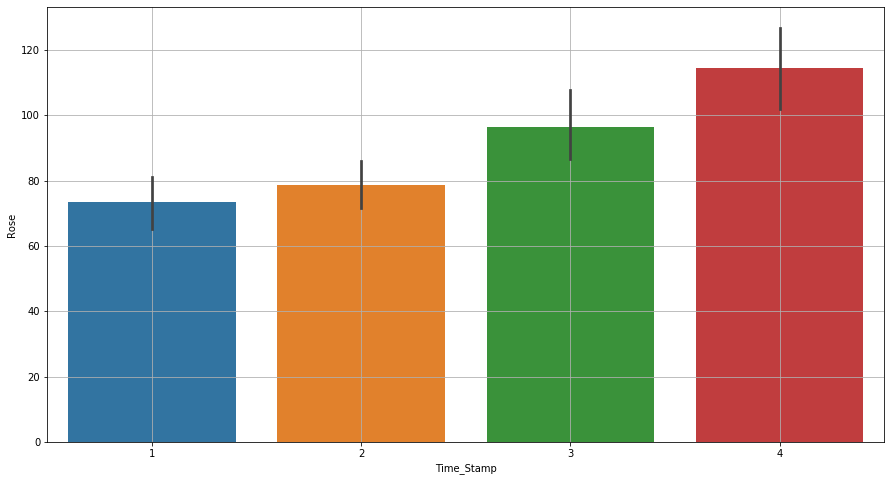

In [16]:
sns.barplot(df.index.quarter,df.Rose,data=df)
plt.grid();

##  Plot the year on year quarterly comparison

In [17]:
df.index.month_name

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', name='Time_Stamp', length=187, freq=None)>

## Month wise data in Pivot table

In [18]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,99.0,129.0,267.0,118.0,112.0,118.0,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.0,226.0,129.0,126.0,222.0,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.0,169.0,77.0,89.0,117.0,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.0,164.0,108.0,75.0,109.0,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.0,159.0,85.0,88.0,87.0,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.0,129.0,82.0,61.0,87.0,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.0,141.0,65.0,57.0,110.0,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.0,157.0,65.0,58.0,87.0,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.0,135.0,115.0,63.0,79.0,83.0,70.0,67.0,100.0,116.0,102.0


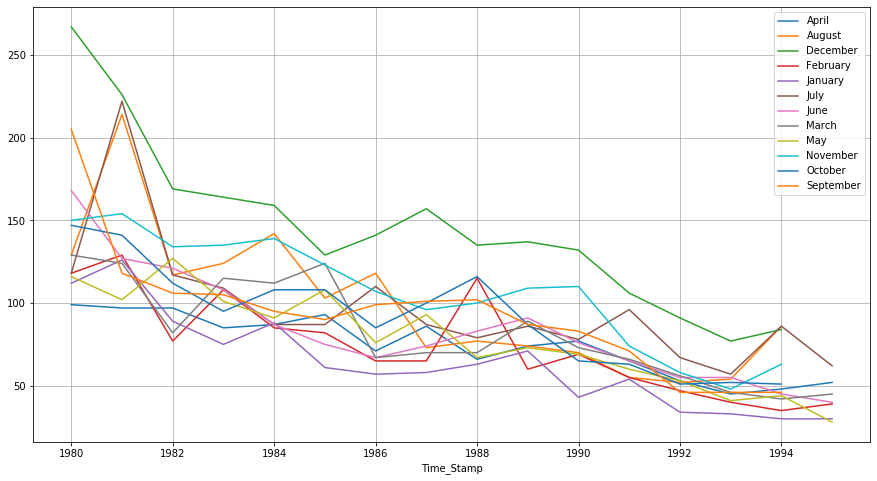

In [19]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

## Plot the distribution plot for quarterly comparison

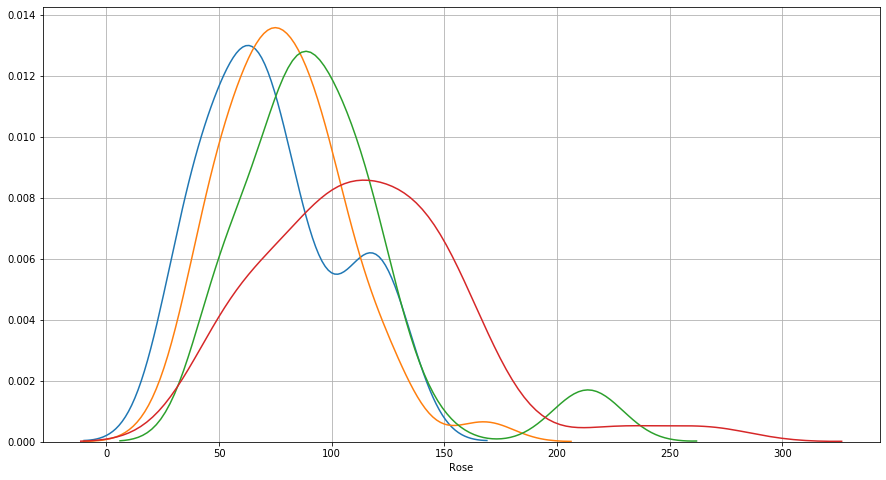

In [20]:
sns.distplot(df.loc[df.index.quarter == 1]['Rose'],hist=False)
sns.distplot(df.loc[df.index.quarter == 2]['Rose'],hist=False)
sns.distplot(df.loc[df.index.quarter == 3]['Rose'],hist=False)
sns.distplot(df.loc[df.index.quarter == 4]['Rose'],hist=False)
plt.grid();

## Plot a graph of monthly Sales across years

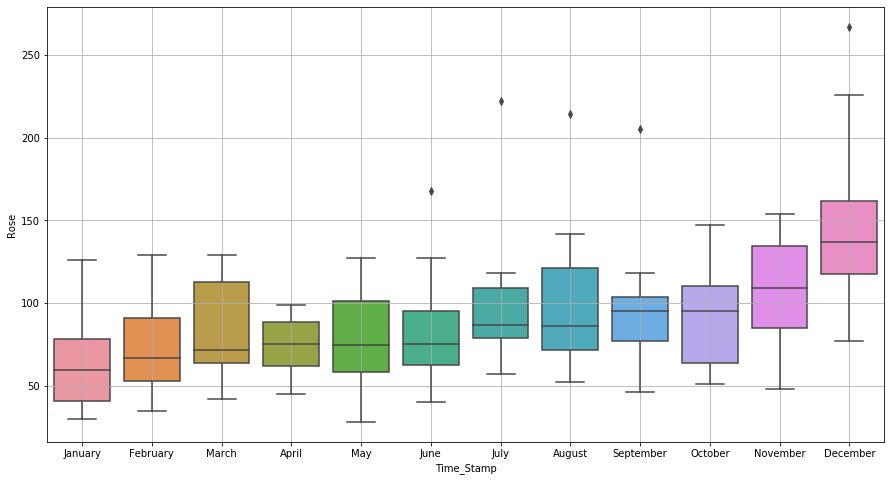

In [21]:
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

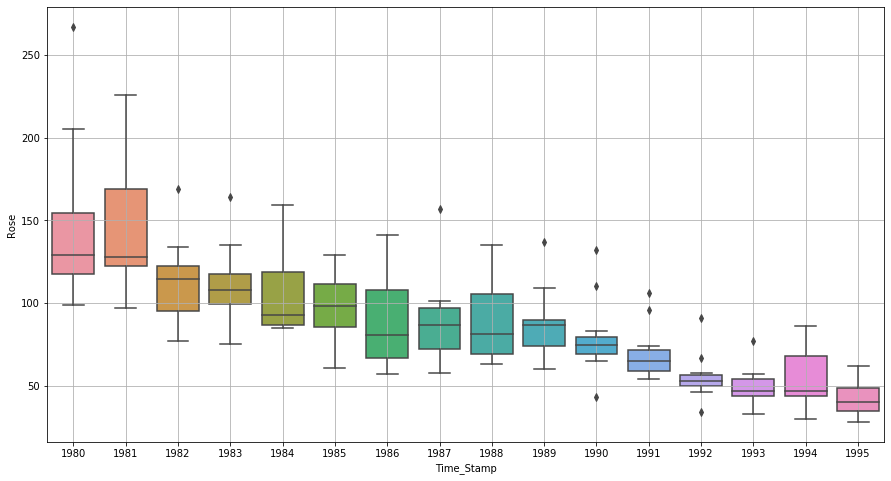

In [22]:
sns.boxplot(x = df.index.year,y = df['Rose'])
plt.grid();

**There are outliers in the sale of Rose wine over the years and it occurred more frequently in the months of June, July, August and September.**

## Decompose the data and check the trend, seasonality and the irregular/residual/error component

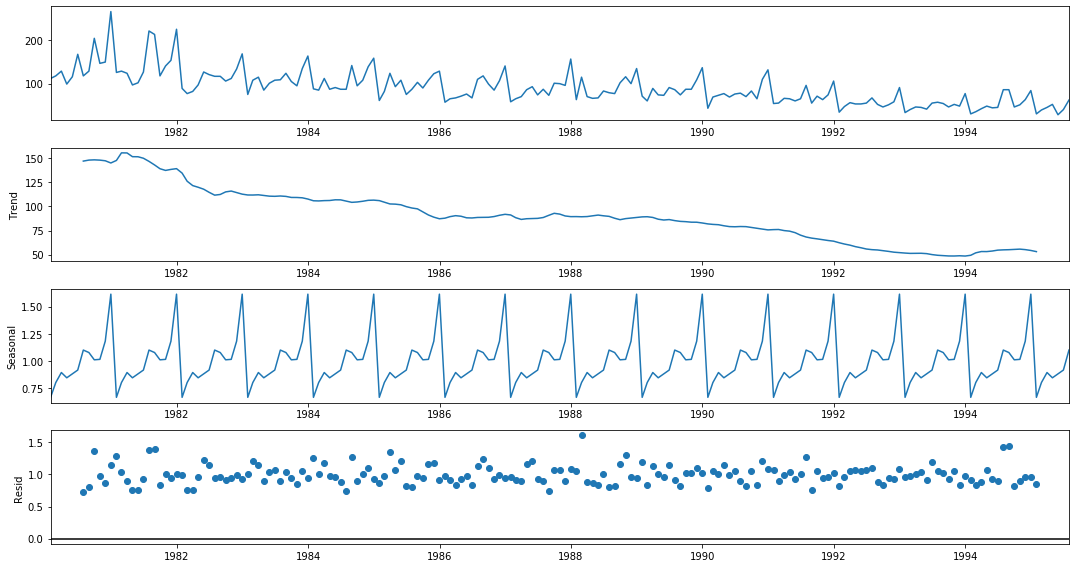

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [24]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(7),'\n')
print('Seasonality','\n',seasonality.head(7),'\n')
print('Residual','\n',residual.head(7),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.664904
1980-02-29    0.801176
1980-03-31    0.893234
1980-04-30    0.844896
1980-05-31    0.881276
1980-06-30    0.915970
1980-07-31    1.099977
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.729348
Name: resid, dtype: float64 



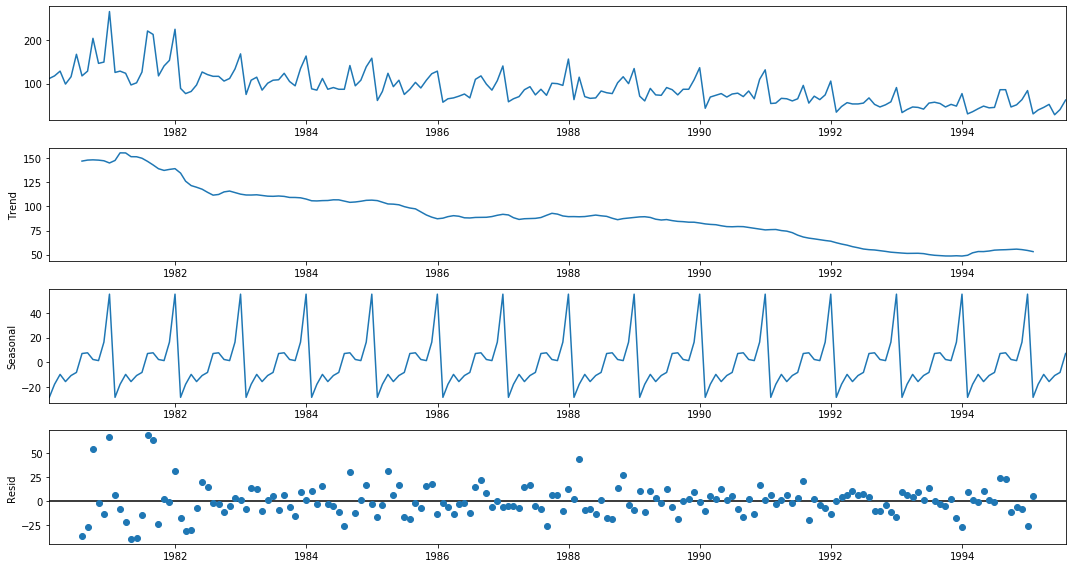

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df,model='addictive')
decomposition.plot();



In [26]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(7),'\n')
print('Seasonality','\n',seasonality.head(7),'\n')
print('Residual','\n',residual.head(7),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -28.355258
1980-02-29   -17.794345
1980-03-31    -9.764583
1980-04-30   -15.577083
1980-05-31   -10.675298
1980-06-30    -8.157440
1980-07-31     7.161409
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -36.244742
Name: resid, dtype: float64 



## Plot the Empirical Cumulative Distribution.

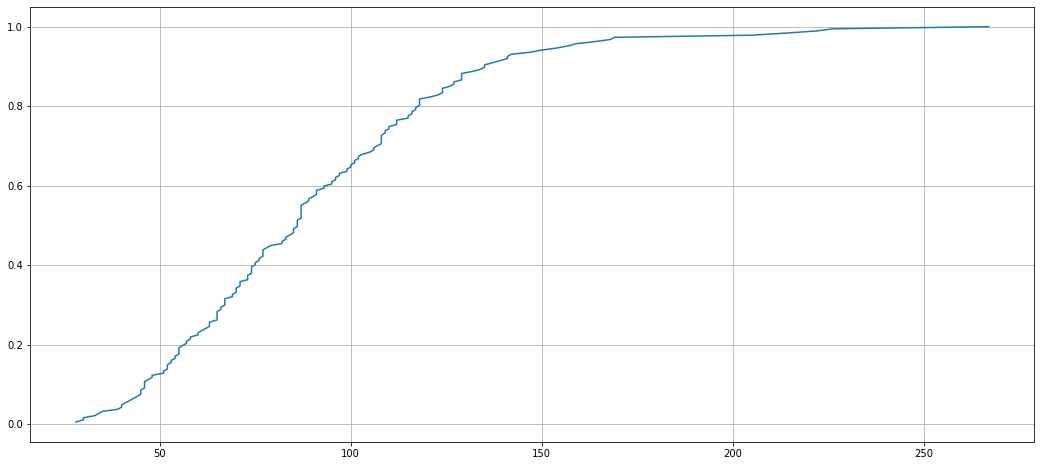

In [27]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('');

## Plot the average Sales per month and the month on month percentage change of Sales.

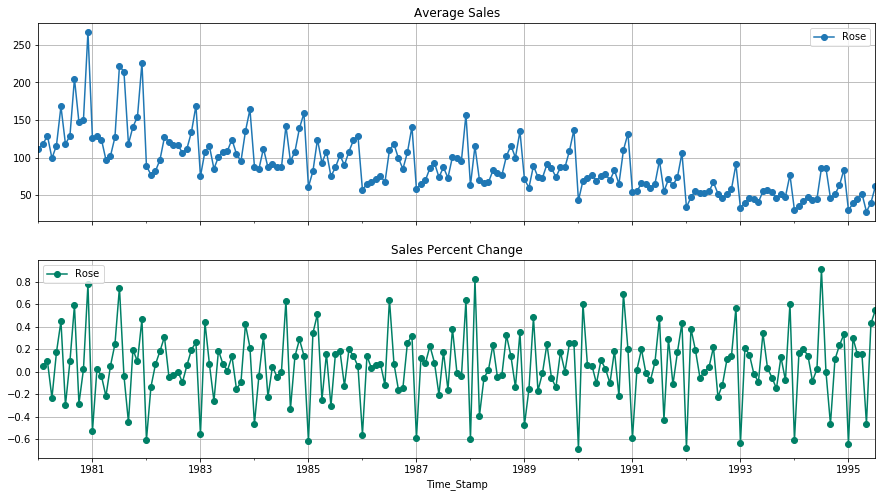

In [28]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

## 3. Split the data into training and test. The test data should start in 1991.

In [29]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]


In [30]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [31]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


## 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

## Building different models and comparing the accuracy metrics.
## Model 1: Linear Regression

**For this particular linear regression, we are going to regress the 'Rose' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.**

In [32]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [33]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [34]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0    43
1991-02-28  55.0    44
1991-03-31  66.0    45
1991-04-30  65.0    46
1991-05-31  60.0    47 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0    93
1995-04-30  52.0    94
1995-05-31  28.0    95
1995-06-30  40.0    96
1995-07-31  62.0    97 



Now that our training and test data has been modified, let us go ahead use 𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯ to build the model on the training data and test the model on the test data.

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

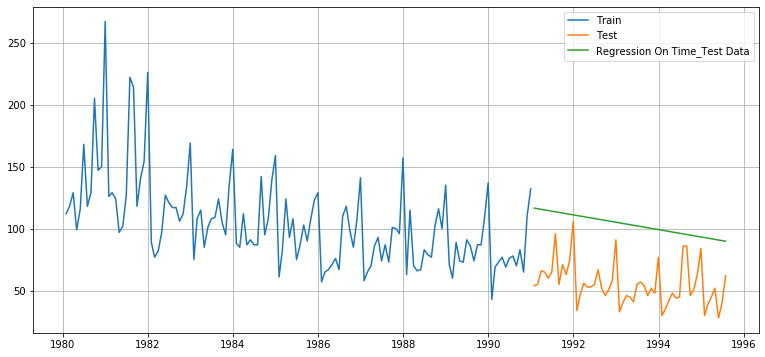

In [38]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

## Defining the accuracy metrics.

In [39]:
from sklearn import metrics

In [40]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 50.573


In [41]:
resultsDf = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,RMSE
RegressionOnTime,50.5729


## Model 2: Naive Approach: 𝑦̂ 𝑡+1=𝑦𝑡

**For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.**

In [42]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [43]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

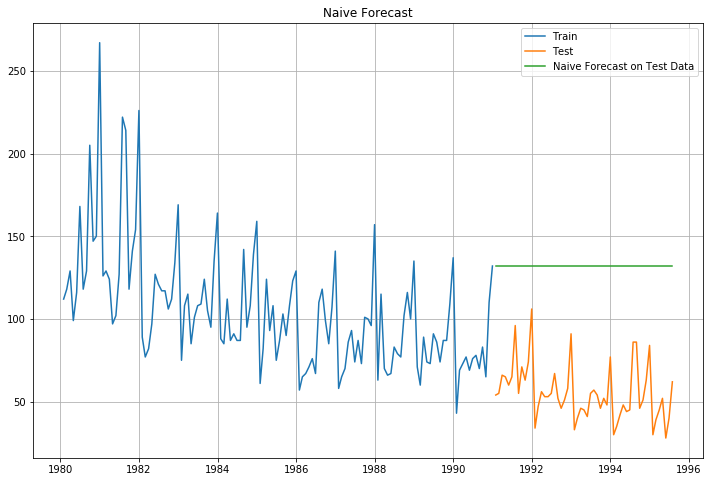

In [44]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [45]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 78.485


In [46]:
resultsDf_2 = pd.DataFrame({'RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,RMSE
RegressionOnTime,50.57290
NaiveModel,78.48532


## Method 3: Simple Average

**For this particular simple average method, we will forecast by using the average of the training values.**

In [47]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [48]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


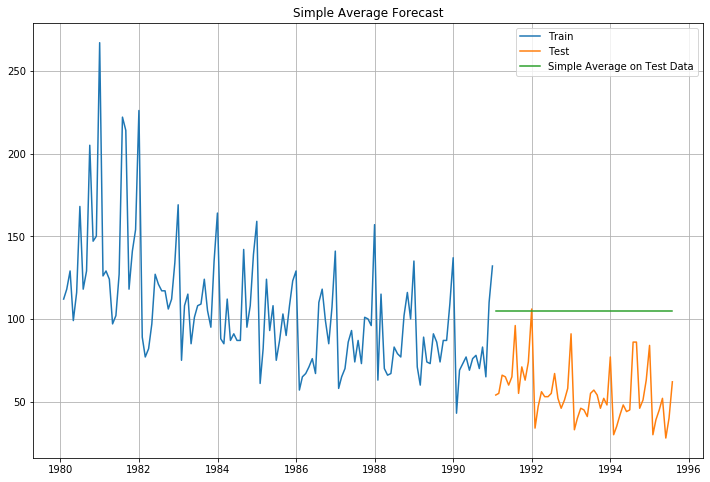

In [49]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [50]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 52.370


In [51]:
resultsDf_3 = pd.DataFrame({'RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,RMSE
RegressionOnTime,50.572900
NaiveModel,78.485320
SimpleAverageModel,52.369847


## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [52]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


#### Trailing moving averages

In [53]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


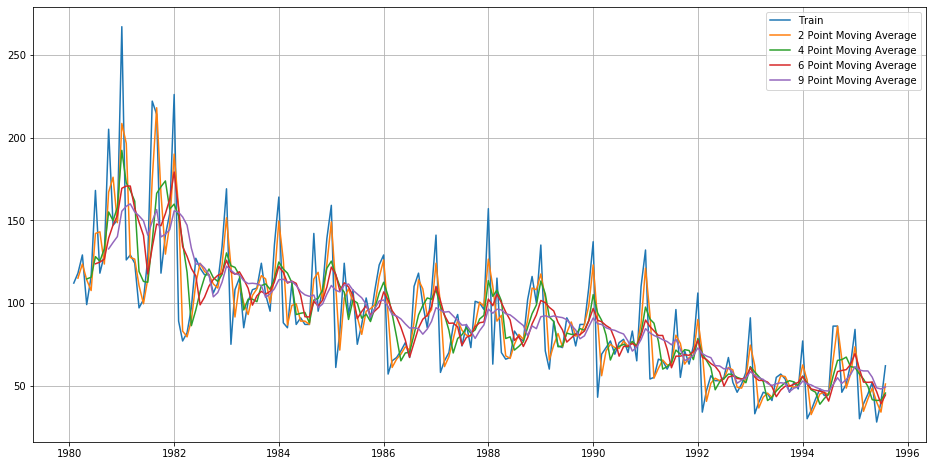

In [54]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

**Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.**

In [55]:
#Creating train and test set 
trailing_MovingAverage_train=df[df.index.year < 1991]
trailing_MovingAverage_test=df[df.index.year >= 1991]
print(trailing_MovingAverage_train.head())
print(trailing_MovingAverage_test.head())


             Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
            Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0


In [56]:

trailing_MovingAverage_test['Trailing_2'] = trailing_MovingAverage_test['Rose'].rolling(2).mean()
trailing_MovingAverage_test['Trailing_4'] = trailing_MovingAverage_test['Rose'].rolling(4).mean()
trailing_MovingAverage_test['Trailing_6'] = trailing_MovingAverage_test['Rose'].rolling(6).mean()
trailing_MovingAverage_test['Trailing_9'] = trailing_MovingAverage_test['Rose'].rolling(9).mean()


trailing_MovingAverage_train['Trailing_2'] = trailing_MovingAverage_train['Rose'].rolling(2).mean()
trailing_MovingAverage_train['Trailing_4'] = trailing_MovingAverage_train['Rose'].rolling(4).mean()
trailing_MovingAverage_train['Trailing_6'] = trailing_MovingAverage_train['Rose'].rolling(6).mean()
trailing_MovingAverage_train['Trailing_9'] = trailing_MovingAverage_train['Rose'].rolling(9).mean()
trailing_MovingAverage_test.head()

C:\Users\Pc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Pc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Pc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1991-01-31,54.0,NaN,NaN,NaN,NaN
1991-02-28,55.0,54.5,NaN,NaN,NaN
1991-03-31,66.0,60.5,NaN,NaN,NaN
1991-04-30,65.0,65.5,60.0,NaN,NaN
1991-05-31,60.0,62.5,61.5,NaN,NaN


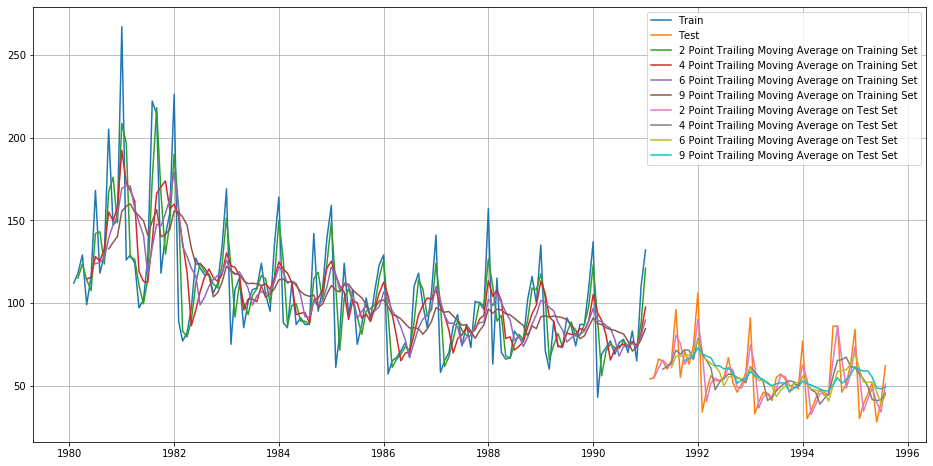

In [57]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train["Rose"], label='Train')
plt.plot(trailing_MovingAverage_test["Rose"] ,label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [58]:
trailing_MovingAverage_test = trailing_MovingAverage_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

### Model Evaluation

##### Done only on the test data.

In [59]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 13.161
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 19.602
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 23.072
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 28.988 


In [60]:
resultsDf_4 = pd.DataFrame({'RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,RMSE
RegressionOnTime,50.572900
NaiveModel,78.485320
SimpleAverageModel,52.369847
2pointTrailingMovingAverage,13.160547
4pointTrailingMovingAverage,19.601600
6pointTrailingMovingAverage,23.071660
9pointTrailingMovingAverage,28.987520


**Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots**

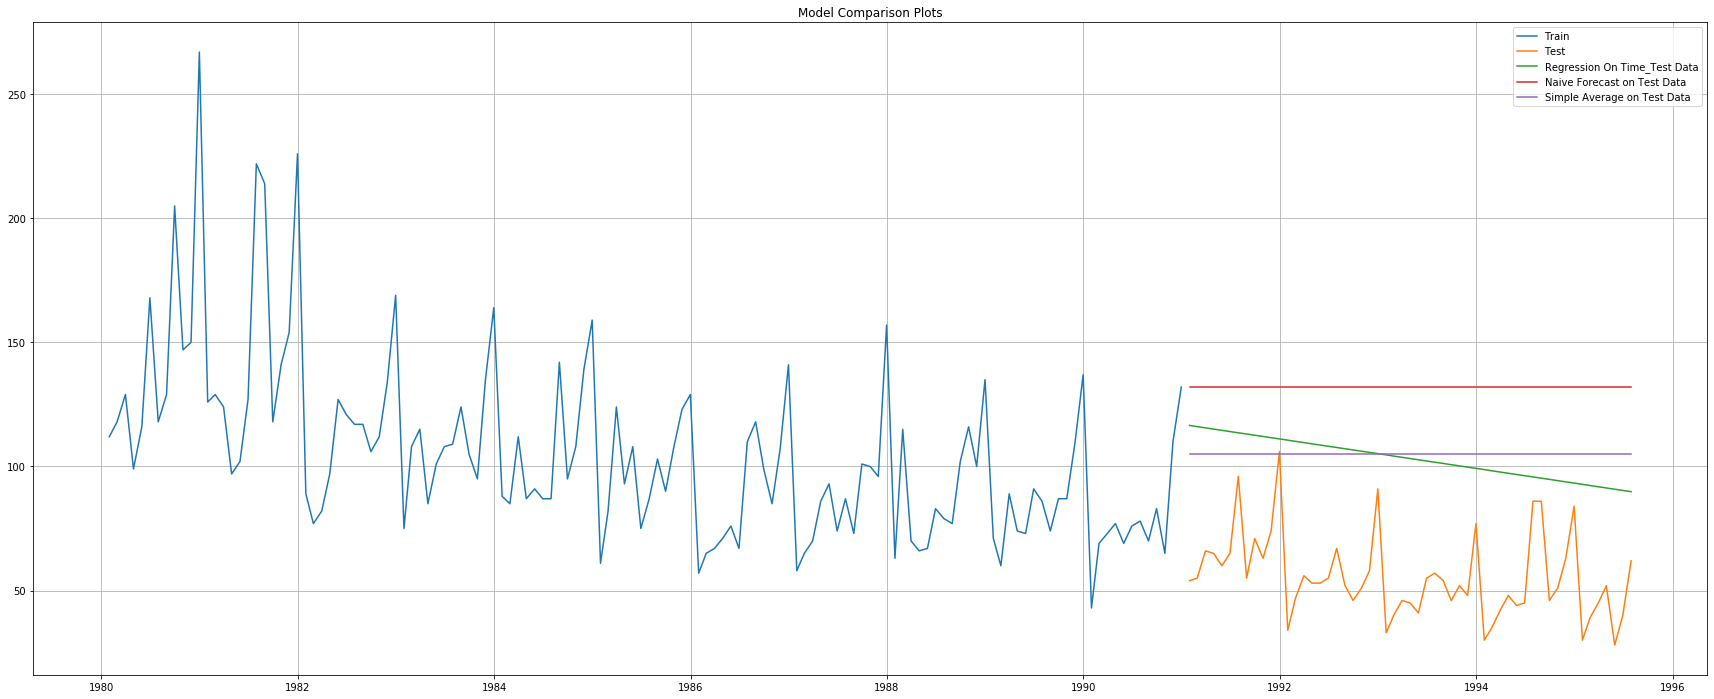

In [61]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

#plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [62]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [63]:
SES_train = train.copy()
SES_test = test.copy()

In [64]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [65]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [66]:
model_SES_autofit.params

{'smoothing_level': 0.09874989805931945,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38695595667537,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [67]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test.copy()))
SES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,87.104999
1991-02-28,55.0,87.104999
1991-03-31,66.0,87.104999
1991-04-30,65.0,87.104999
1991-05-31,60.0,87.104999


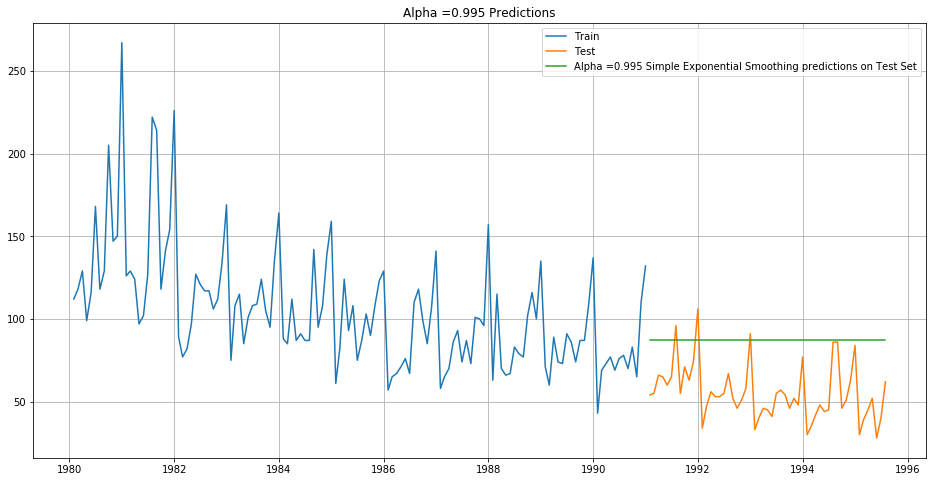

In [68]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

### Model Evaluation for $\alpha$ = 0.995 : Simple Exponential Smoothing

In [69]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 35.931


In [70]:
resultsDf_5 = pd.DataFrame({'RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,RMSE
RegressionOnTime,50.572900
NaiveModel,78.485320
SimpleAverageModel,52.369847
2pointTrailingMovingAverage,13.160547
4pointTrailingMovingAverage,19.601600
6pointTrailingMovingAverage,23.071660
9pointTrailingMovingAverage,28.987520
"Alpha=0.995,SimpleExponentialSmoothing",35.931355


# Method 7: Triple Exponential Smoothing (Holt - Winter's Model)
## Three parameters α, βand γ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.


In [71]:
TES_train = train.copy()
TES_test = test.copy()

In [72]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [73]:
model_TES_autofit = model_TES.fit()

C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [74]:
model_TES_autofit.params

{'smoothing_level': 0.10609628211044227,
 'smoothing_slope': 0.04843853483296353,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565233828687,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550285, 1.65927166, 1.80572675, 1.58888842, 1.77822733,
        1.92604398, 2.11649492, 2.25135237, 2.11690636, 2.08112883,
        2.40927327, 3.30448211]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [75]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,56.674334
1991-02-28,55.0,63.471272
1991-03-31,66.0,68.788792
1991-04-30,65.0,60.277823
1991-05-31,60.0,67.180378


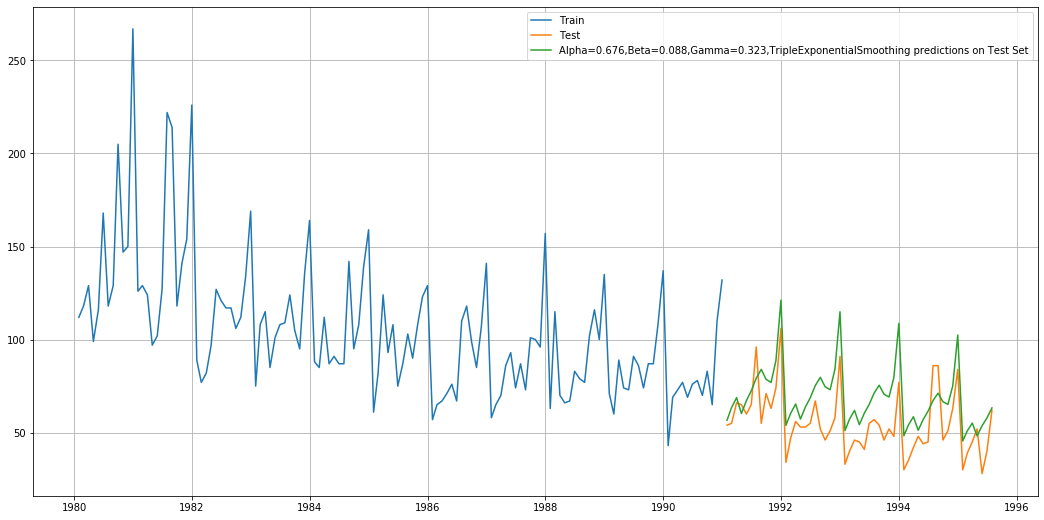

In [76]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [77]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 17.071


In [78]:
resultsDf_8_1 = pd.DataFrame({'RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,RMSE
RegressionOnTime,50.572900
NaiveModel,78.485320
SimpleAverageModel,52.369847
2pointTrailingMovingAverage,13.160547
4pointTrailingMovingAverage,19.601600
6pointTrailingMovingAverage,23.071660
9pointTrailingMovingAverage,28.987520
"Alpha=0.995,SimpleExponentialSmoothing",35.931355
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",17.071422


## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05
.

In [79]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

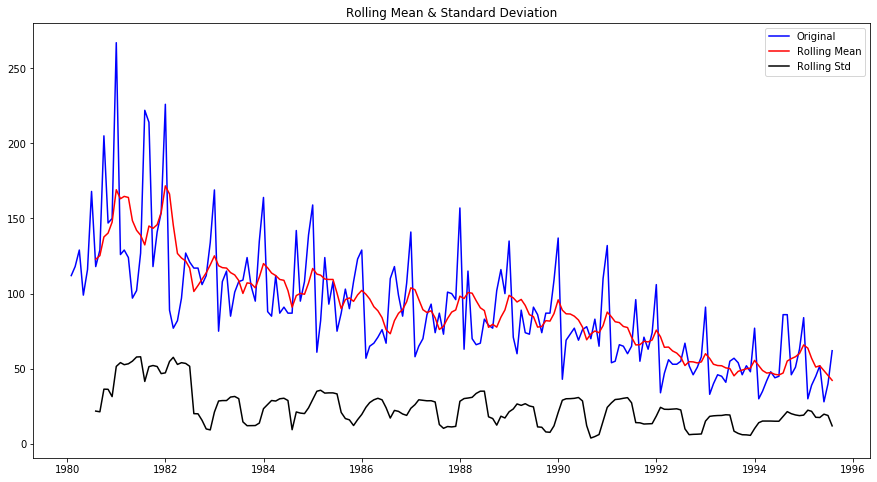

Results of Dickey-Fuller Test:
Test Statistic                  -1.933053
p-value                          0.316675
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [80]:
test_stationarity(df['Rose'])

**We see that at 5% significant level the Time Series is non-stationary.**

**Let us take a difference of order 1 and check whether the Time Series is stationary or not.**

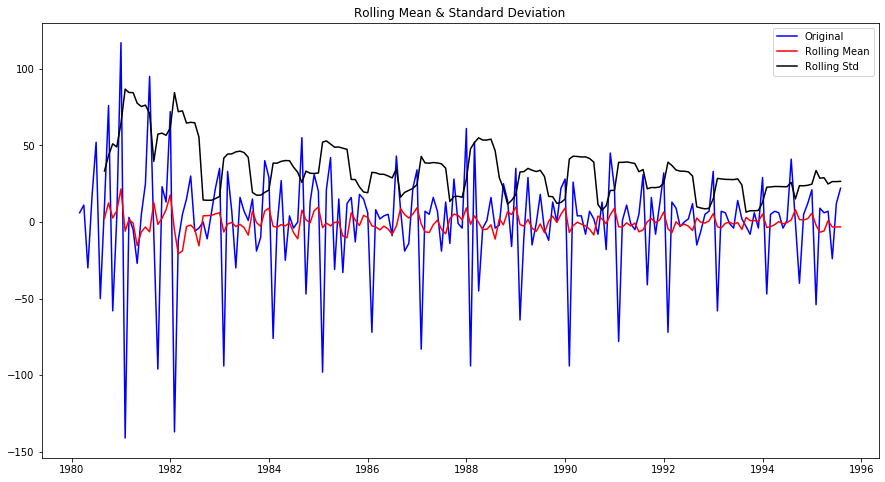

Results of Dickey-Fuller Test:
Test Statistic                -7.890753e+00
p-value                        4.443288e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [81]:
test_stationarity(df['Rose'].diff().dropna())

**We see that at 𝛼 = 0.05 the Time Series is indeed stationary.**

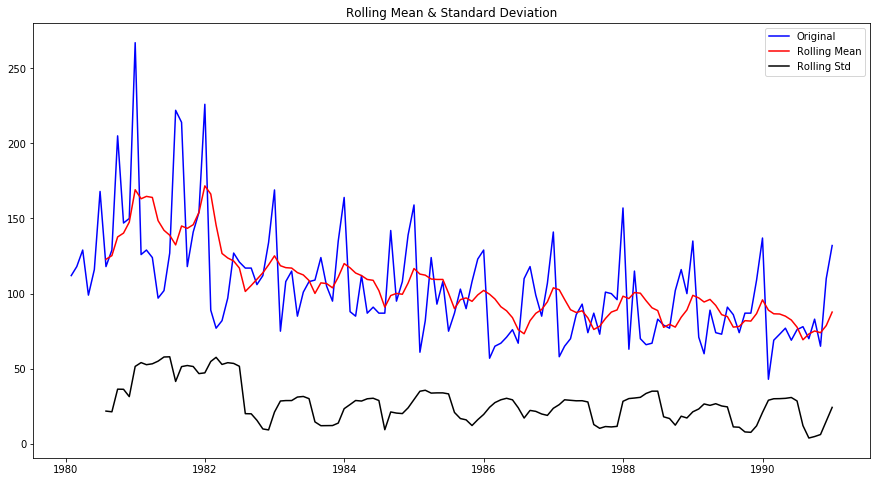

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [82]:
test_stationarity(train['Rose'])

**We see that at 5% significant level the Time Series is non-stationary.**

**Let us take a difference of order 1 and check whether the Time Series is stationary or not.**


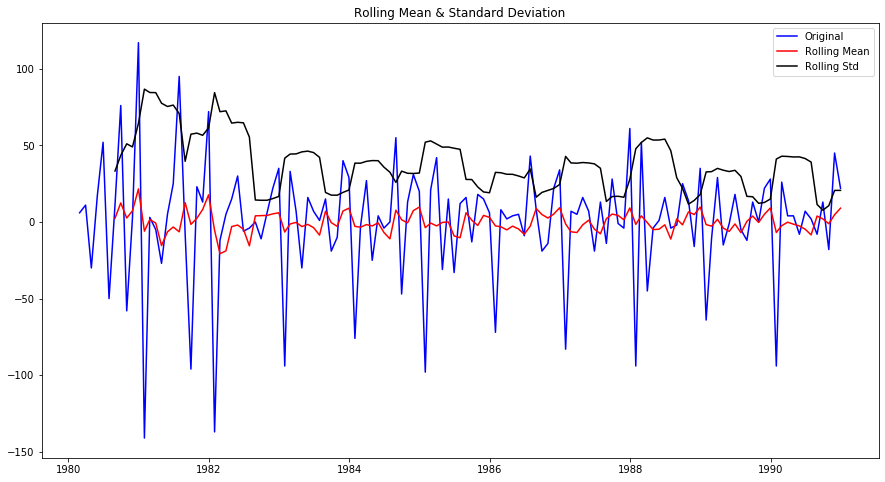

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [83]:
test_stationarity(train['Rose'].diff().dropna())

**We see that at 𝛼 = 0.05 the Time Series is indeed stationary.**

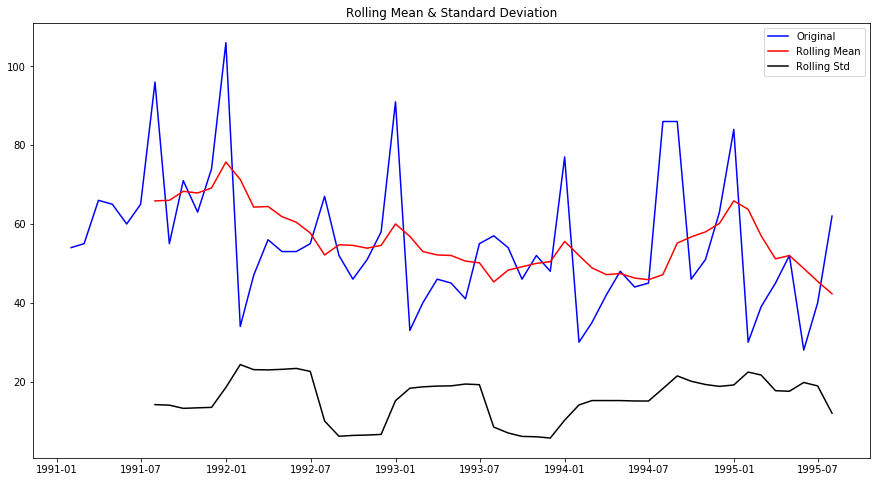

Results of Dickey-Fuller Test:
Test Statistic                 -3.371814
p-value                         0.011958
#Lags Used                     11.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64 



In [84]:
test_stationarity(test['Rose'])

**We see that at 𝛼 = 0.05 the Time Series is indeed stationary.**

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## ARIMA

In [85]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [86]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [87]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464035
ARIMA(0, 1, 2) - AIC:1276.8353724115532
ARIMA(1, 1, 0) - AIC:1319.3483105803125
ARIMA(1, 1, 1) - AIC:1277.7757488779507
ARIMA(1, 1, 2) - AIC:1277.3592330926072
ARIMA(2, 1, 0) - AIC:1300.609261174427
ARIMA(2, 1, 1) - AIC:1279.045689409309
ARIMA(2, 1, 2) - AIC:1279.2986939365255


In [88]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835372
5,"(1, 1, 2)",1277.359233
4,"(1, 1, 1)",1277.775749
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [89]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sun, 28 Mar 2021   AIC                           1276.835
Time:                        22:33:39   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

### Predict on the Test Set using this model and evaluate the model.

In [90]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [91]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

16.934080082434704


In [92]:
resultsDfA = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDfA

,RMSE
"ARIMA(0,1,2)",16.93408


### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [93]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 3) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 3)
Model: (0, 1, 2)(0, 0, 2, 3)
Model: (1, 1, 0)(1, 0, 0, 3)
Model: (1, 1, 1)(1, 0, 1, 3)
Model: (1, 1, 2)(1, 0, 2, 3)
Model: (2, 1, 0)(2, 0, 0, 3)
Model: (2, 1, 1)(2, 0, 1, 3)
Model: (2, 1, 2)(2, 0, 2, 3)


In [94]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [95]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 3) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 3) - AIC:1295.3960232749794
SARIMA(0, 1, 0)x(0, 0, 2, 3) - AIC:1265.5458096085474
SARIMA(0, 1, 0)x(1, 0, 0, 3) - AIC:1304.9014696515212
SARIMA(0, 1, 0)x(1, 0, 1, 3) - AIC:1297.3794000947541
SARIMA(0, 1, 0)x(1, 0, 2, 3) - AIC:1254.3407046499756
SARIMA(0, 1, 0)x(2, 0, 0, 3) - AIC:1274.6483610269986
SARIMA(0, 1, 0)x(2, 0, 1, 3) - AIC:1263.716986940856
SARIMA(0, 1, 0)x(2, 0, 2, 3) - AIC:1254.7291708471703
SARIMA(0, 1, 1)x(0, 0, 0, 3) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 3) - AIC:1235.0737797696302
SARIMA(0, 1, 1)x(0, 0, 2, 3) - AIC:1203.3621023930789
SARIMA(0, 1, 1)x(1, 0, 0, 3) - AIC:1255.7938431188293
SARIMA(0, 1, 1)x(1, 0, 1, 3) - AIC:1237.0717411587318
SARIMA(0, 1, 1)x(1, 0, 2, 3) - AIC:1205.3598510146394
SARIMA(0, 1, 1)x(2, 0, 0, 3) - AIC:1224.3493651457345
SARIMA(0, 1, 1)x(2, 0, 1, 3) - AIC:1226.0449854644812
SARIMA(0, 1, 1)x(2, 0, 2, 3) - AIC:1163.5428964465532
SARIMA(0, 1, 2)x(0, 0, 0, 3) 

In [96]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
80,"(2, 1, 2)","(2, 0, 2, 3)",1151.281272
26,"(0, 1, 2)","(2, 0, 2, 3)",1157.206913
53,"(1, 1, 2)","(2, 0, 2, 3)",1158.761999
62,"(2, 1, 0)","(2, 0, 2, 3)",1160.450787
17,"(0, 1, 1)","(2, 0, 2, 3)",1163.542896


In [97]:
import statsmodels.api as sm

auto_SARIMA_3 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 3),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_3 = auto_SARIMA_3.fit(maxiter=1000)
print(results_auto_SARIMA_3.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 3)   Log Likelihood                -566.641
Date:                           Sun, 28 Mar 2021   AIC                           1151.281
Time:                                   22:34:02   BIC                           1176.517
Sample:                                        0   HQIC                          1161.531
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6062      0.135      4.501      0.000       0.342       0.870
ar.L2         -0.2801      0.101     -2.783

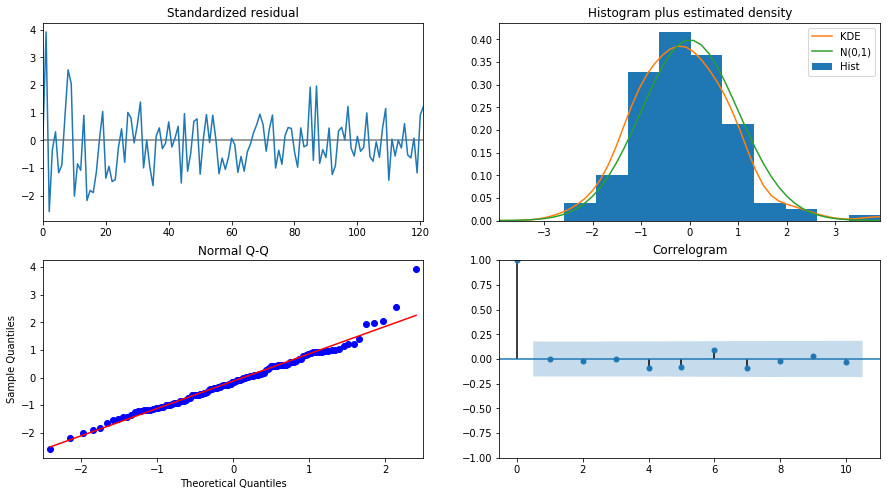

In [98]:
results_auto_SARIMA_3.plot_diagnostics()
plt.show()

**From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.**

## Predict on the Test Set using this model and evaluate the model.

In [99]:
predicted_auto_SARIMA_3 = results_auto_SARIMA_3.get_forecast(steps=len(test))

In [100]:
predicted_auto_SARIMA_3.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,70.201691,23.790029,23.574091,116.829291
1,63.480867,23.893618,16.650236,110.311497
2,75.517760,24.028852,28.422075,122.613444
3,72.780717,24.023165,25.696180,119.865255
4,73.306240,24.291474,25.695826,120.916654


In [101]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_3.predicted_mean,squared=False)
print(rmse)

29.19103865095427


In [102]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(2,1,2)(2,0,2,3)'])


resultsDfA = pd.concat([resultsDfA,temp_resultsDf])

resultsDfA

,RMSE
"ARIMA(0,1,2)",16.934080
"SARIMA(2,1,2)(2,0,2,3)",29.191039


## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

**Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.**


In [103]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

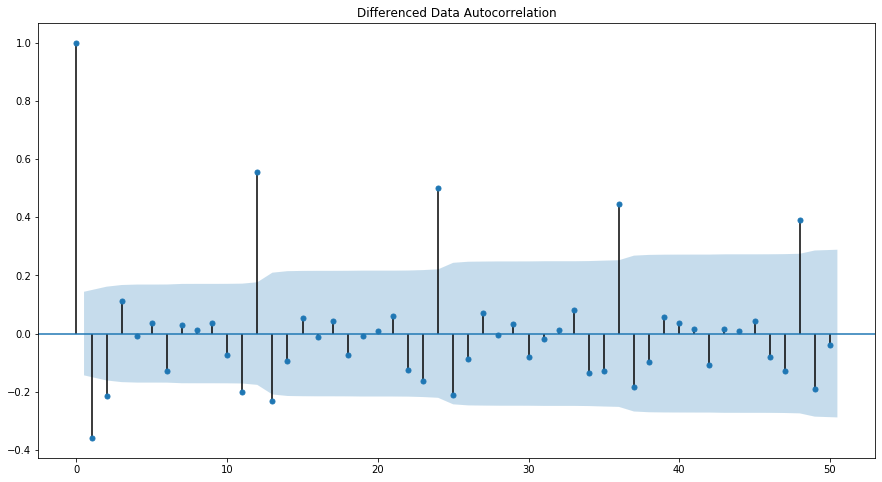

In [104]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

**We see that there can be a seasonality of 12 and 24. We will run our auto SARIMA models by setting seasonality both as 12 and 24.**

## Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA_AIC.sort_values(by=['AIC']).head()

import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

results_auto_SARIMA_6.plot_diagnostics()
plt.show()

**From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.**

## Predict on the Test Set using this model and evaluate the model.

predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDfA = pd.concat([resultsDfA,temp_resultsDf])

resultsDfA

**We see that we have huge gain the RMSE value by including the seasonal parameters as well.**

## Setting the seasonality as 12 for the iteration of the auto SARIMA model

In [105]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [106]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [107]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207484
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380895
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386836
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635749978
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697554
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945783
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918332
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383756
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918244
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330946082
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483309101
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535918
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461658
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988304377957
SARIMA(0, 1, 2)x(0, 0

In [108]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
53,"(1, 1, 2)","(2, 0, 2, 12)",889.871767
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [109]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 28 Mar 2021   AIC                            887.938
Time:                                    22:34:53   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.715     -0.004      0.996    -372.677     370.991
ma.L2         -0.1573     29.805   

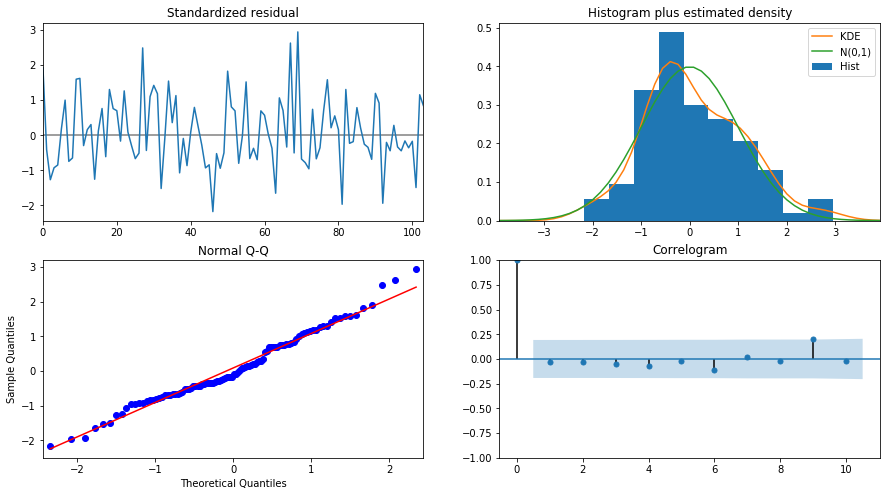

In [110]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

**Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.**

## Predict on the Test Set using this model and evaluate the model.

In [111]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [112]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867263,15.928500,31.647975,94.086550
1,70.541190,16.147658,38.892361,102.190019
2,77.356410,16.147656,45.707586,109.005234
3,76.208814,16.147656,44.559990,107.857638
4,72.747398,16.147656,41.098573,104.396222


In [113]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.345252909800436


In [114]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDfA = pd.concat([resultsDfA,temp_resultsDf])

resultsDfA

,RMSE
"ARIMA(0,1,2)",16.934080
"SARIMA(2,1,2)(2,0,2,3)",29.191039
"SARIMA(0,1,2)(2,0,2,12)",26.345253


## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

In [115]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

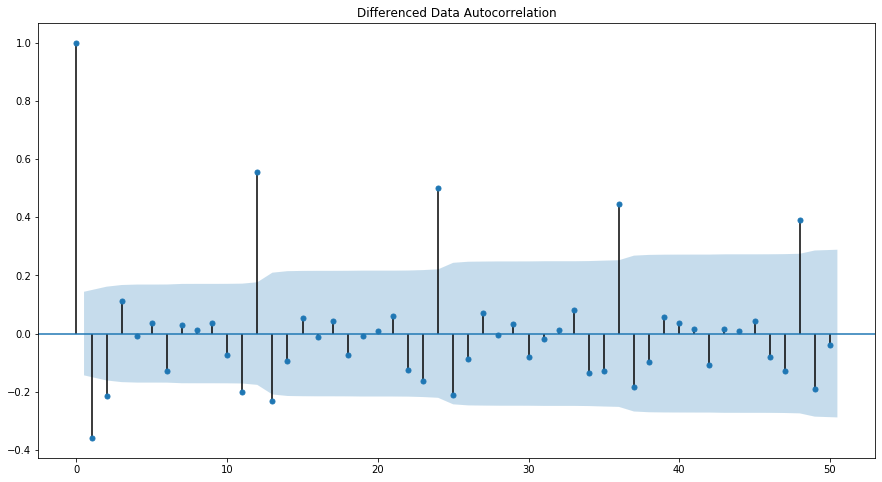

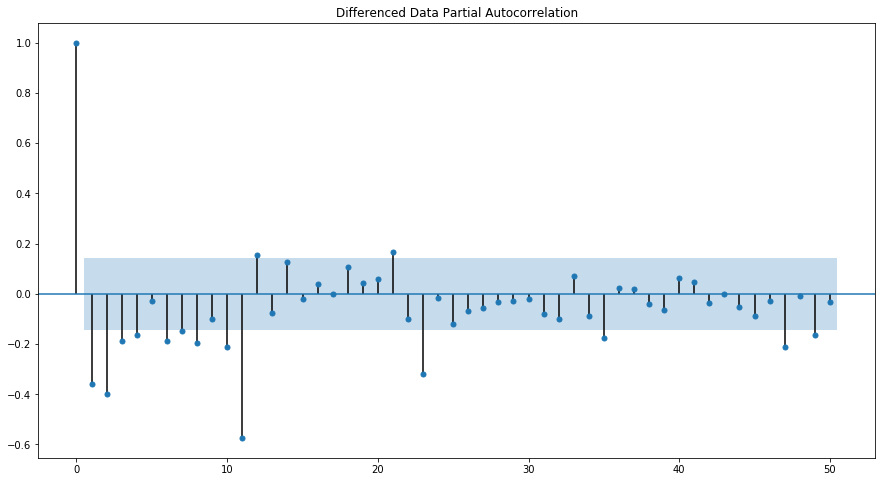

In [116]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

    The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
    The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.


In [117]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -665.576
Method:                           css   S.D. of innovations             38.931
Date:                Sun, 28 Mar 2021   AIC                           1335.153
Time:                        22:34:55   BIC                           1340.903
Sample:                    02-29-1980   HQIC                          1337.489
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1527      3.401      0.045      0.964      -6.514       6.819


**We get a comparatively simpler model by looking at the ACF and the PACF plots.**


Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input variable into a 'float64' type variable else Python might throw an error.

## Predict on the Test Set using this model and evaluate the model.

In [118]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [119]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

82.84724346992752


In [120]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDfA = pd.concat([resultsDfA,temp_resultsDf])

resultsDfA

,RMSE
"ARIMA(0,1,2)",16.934080
"SARIMA(2,1,2)(2,0,2,3)",29.191039
"SARIMA(0,1,2)(2,0,2,12)",26.345253
"ARIMA(0,1,0)",82.847243


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.


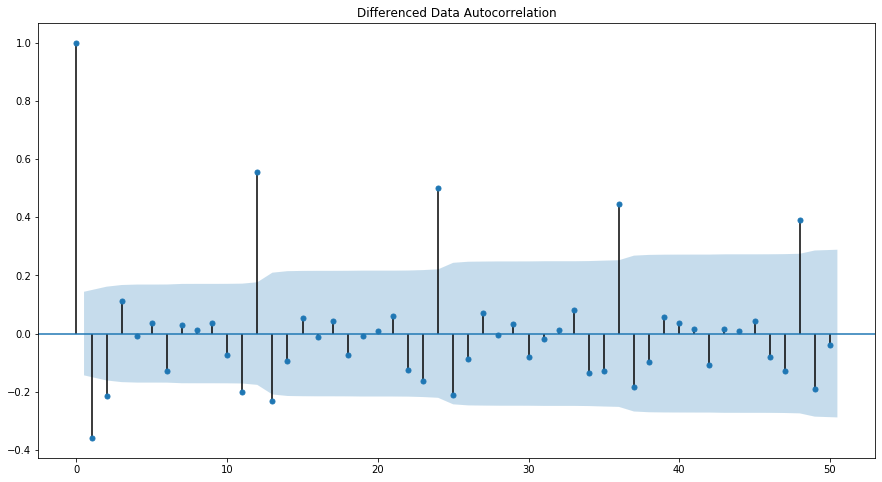

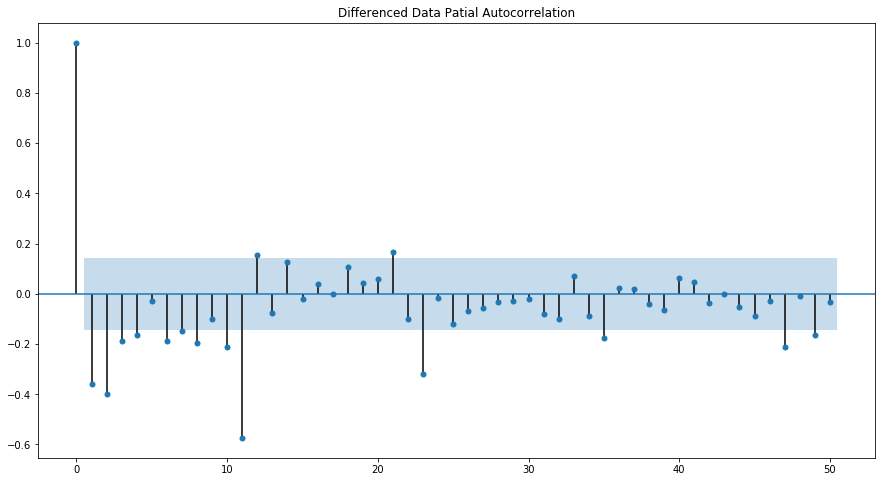

In [121]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

**We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.**


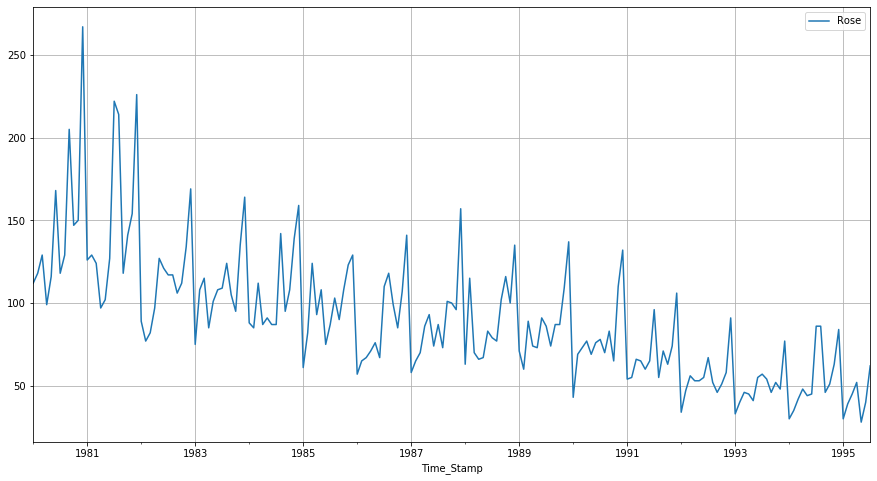

In [122]:
df.plot()
plt.grid();

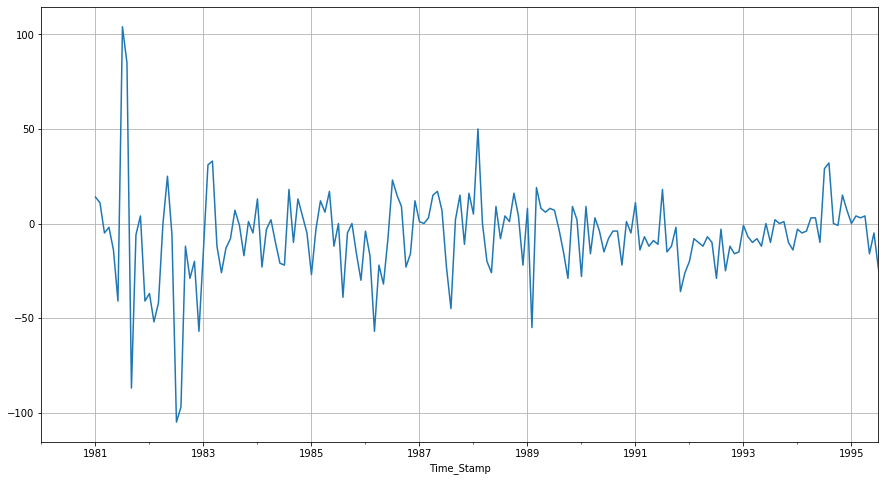

In [123]:
(df['Rose'].diff(12)).plot()
plt.grid();

**We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.**

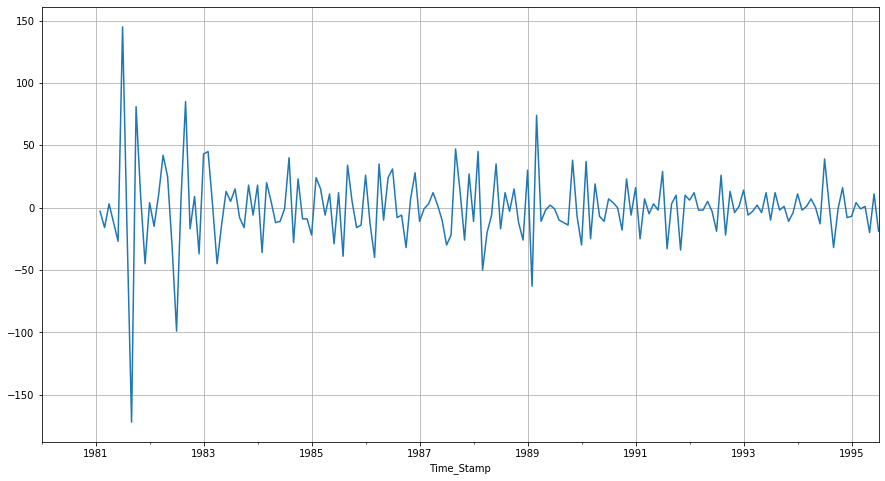

In [124]:
(df['Rose'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model

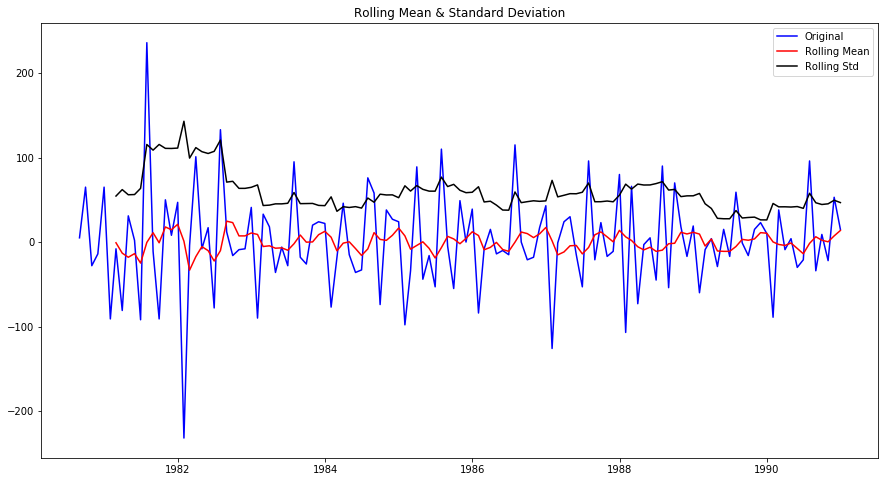

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [125]:
test_stationarity((train['Rose'].diff(6).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


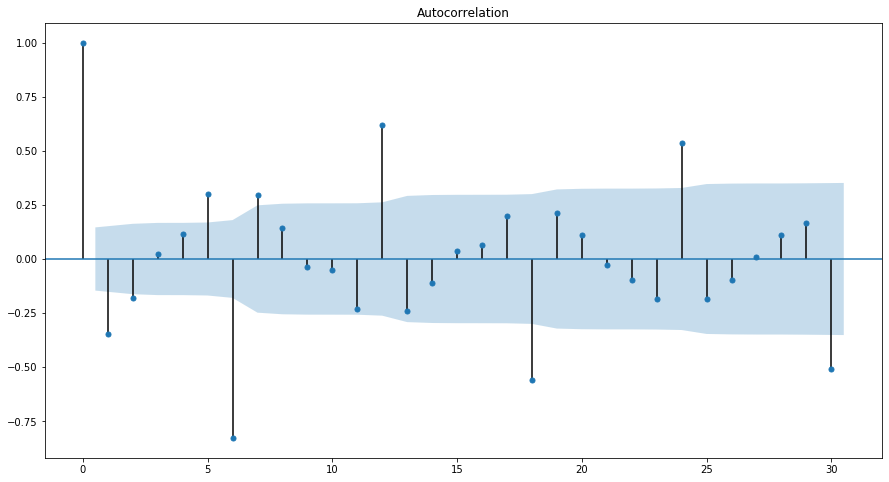

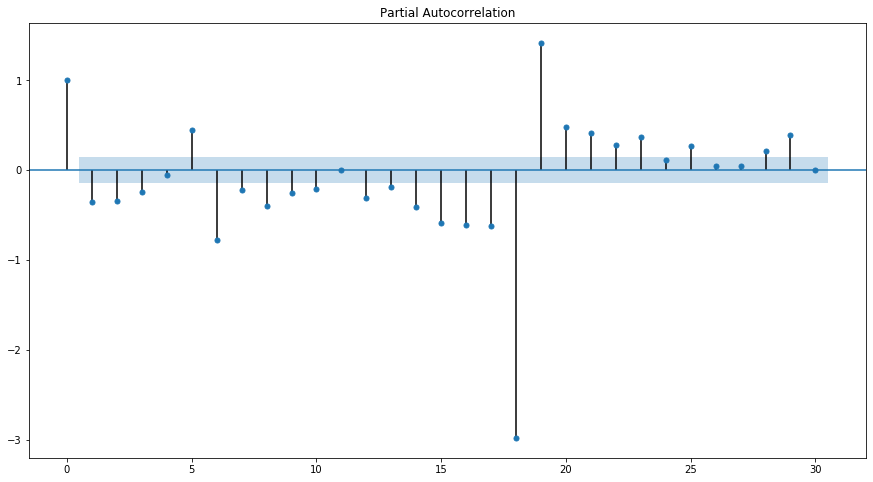

In [126]:
plot_acf((df['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

In [127]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -478.459
Date:                                   Sun, 28 Mar 2021   AIC                            966.918
Time:                                           22:34:58   BIC                            980.235
Sample:                                                0   HQIC                           972.315
                                                   - 132                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -0.8507      0.039    -22.083      0.000    

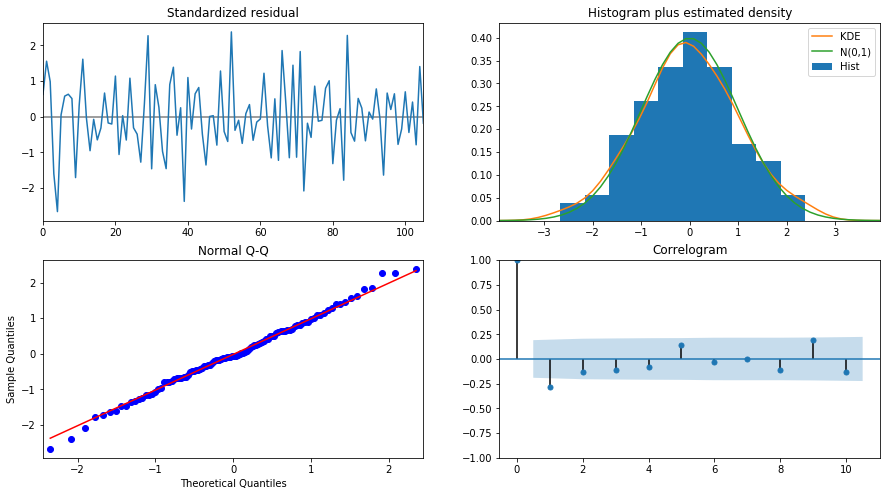

In [128]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [129]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [130]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,65.934116,21.599921,23.599049,108.269183
1,83.524407,30.540960,23.665226,143.383588
2,84.347309,37.402458,11.039839,157.654780
3,82.355793,43.187238,-2.289637,167.001224
4,81.764592,48.283860,-12.870035,176.399218


In [131]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

37.25033921162596


In [132]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(1,1,3,6)'])


resultsDfA = pd.concat([resultsDfA,temp_resultsDf])

resultsDfA

,RMSE
"ARIMA(0,1,2)",16.934080
"SARIMA(2,1,2)(2,0,2,3)",29.191039
"SARIMA(0,1,2)(2,0,2,12)",26.345253
"ARIMA(0,1,0)",82.847243
"SARIMA(0,1,0)(1,1,3,6)",37.250339


## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [133]:
resultsDf = pd.concat([resultsDfA,resultsDf])

resultsDf

,RMSE
"ARIMA(0,1,2)",16.934080
"SARIMA(2,1,2)(2,0,2,3)",29.191039
"SARIMA(0,1,2)(2,0,2,12)",26.345253
"ARIMA(0,1,0)",82.847243
"SARIMA(0,1,0)(1,1,3,6)",37.250339
RegressionOnTime,50.572900
NaiveModel,78.485320
SimpleAverageModel,52.369847
2pointTrailingMovingAverage,13.160547
4pointTrailingMovingAverage,19.601600


## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

## Building the most optimum model on the Full Data.

**Based on the RMSE value the Triple Exponential Smoothing has a better Value but For this value we are choosing Sarima with parameter (0,1,2)(2,0,2,12) as it offers better seasonality and trend.**

In [134]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -651.908
Date:                            Sun, 28 Mar 2021   AIC                           1317.816
Time:                                    22:35:01   BIC                           1339.299
Sample:                                01-31-1980   HQIC                          1326.540
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7459      0.082     -9.116      0.000      -0.906      -0.585
ma.L2         -0.1620      0.076   

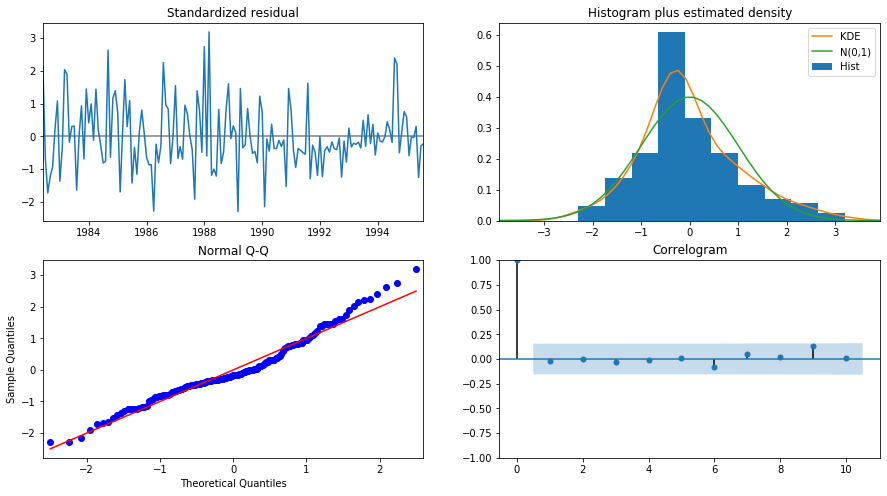

In [135]:
results_full_data_model.plot_diagnostics();

## Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [136]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [137]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,62.670500,14.527735,34.196663,91.144337
1995-09-30,44.944921,14.989556,15.565931,74.323911
1995-10-31,48.147710,15.049171,18.651876,77.643544
1995-11-30,53.468643,15.108552,23.856426,83.080860
1995-12-31,70.527607,15.167699,40.799462,100.255751


In [138]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 27.850516548077536


In [139]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

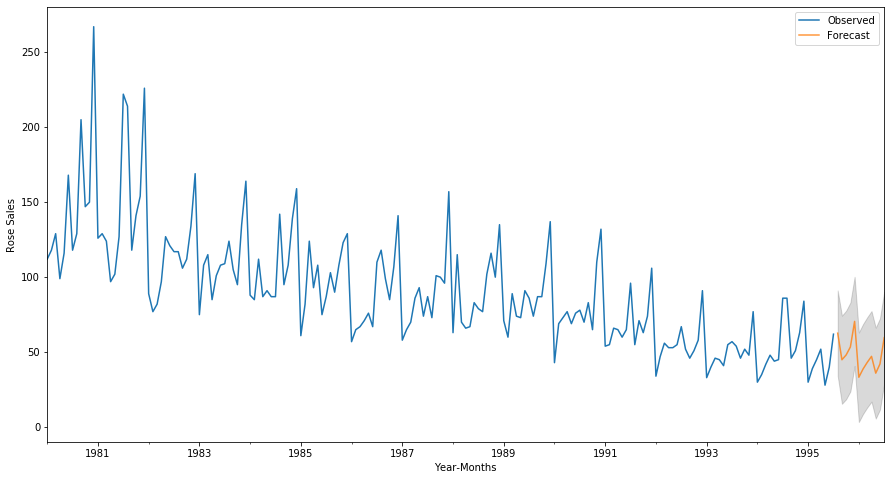

In [140]:
# plot the forecast along with the confidence band

axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=.8)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=0.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose Sales')
plt.legend(loc='best')
plt.show()

## 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

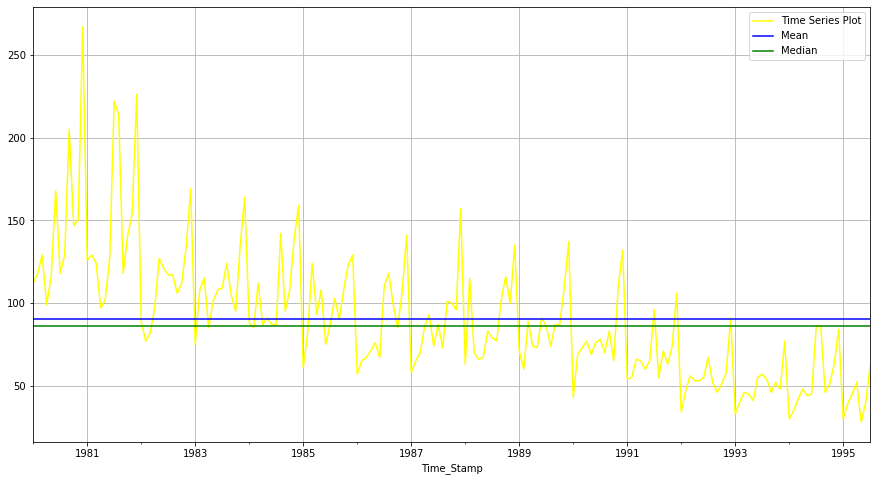

In [143]:
df.plot(color='Yellow')
plt.axhline(df['Rose'].mean(),color='Blue')
plt.axhline(df['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

**1.The mean of over all Sales of the rose wine is about 90 units from 1980 to 1995 while maximum sales of about 265 unit in the year 1981.**

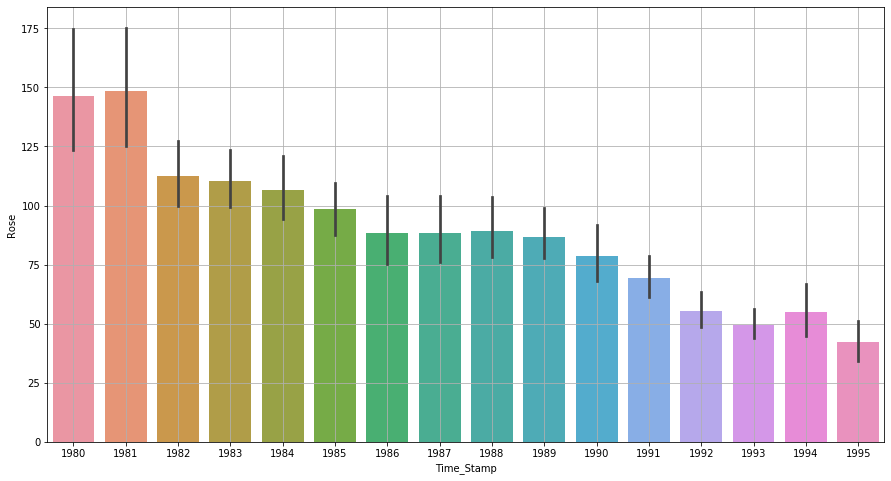

In [144]:
sns.barplot(x = df.index.year,y = df['Rose'])
plt.grid();

**2. From the dataset we can interpret sales of wine has been constantly decreasing across the years with highest sale on 1981 and lowest in 1995.So it is recommended to do more marketing to boost the Rose wine sale.**

**3. Seeing the sales trend it is also recommended to drop this product as its sales and popularity keeps on decreasing and concentrate on other product.**
.

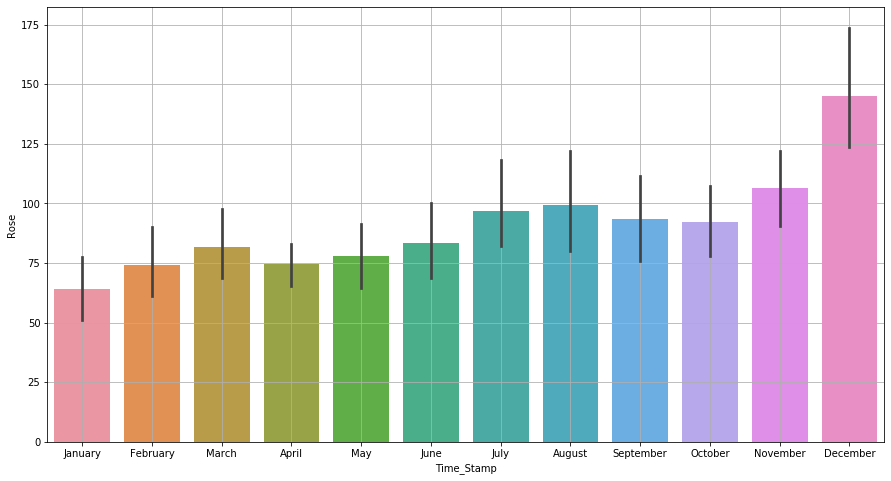

In [145]:
sns.barplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

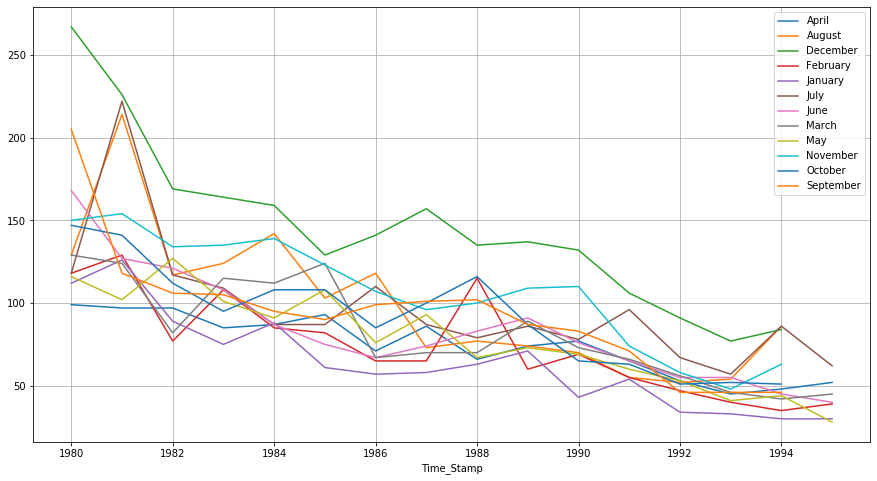

In [141]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

**4. Sales of Rose wine have always been high during the months of December So we can interpret that customers prefer this wine during Holidays such as Christmas , New-year etc.**

**5. From the forecast for the next 12 months it is predicted that the sale of the rose wine will either be same as the previous year or the sale will decrease.**

**6. SARIMA model(0,1,2)(2,0,2,12) is used for prediction for next 12 months. In the frst quarter sales will achieve highest volume & in second quarter Volume will dramatically fall .**